# This cell is auto-generated.

In [1]:
data = 0
while data not in [1, 2]:
    data = int(input('Which data set do you want to use? 1 = Test, 2 = Input '))

if data == 1:
    fp = 'Test/'
    fn = '2207test.txt'
elif data == 2:
    fp = 'Input/'
    fn = '2207input.txt'

f = open(fp + fn, 'r')
raw = [j for j in f.read().splitlines()]

Which data set do you want to use? 1 = Test, 2 = Input 2


In [2]:
import networkx as nx
import re
import matplotlib.pyplot as plt

In [3]:
G = nx.DiGraph()
G.add_nodes_from([(0, {'type': 'dir',
                       'name': '/',
                       'size': 0})])

In [4]:
curdir = 0
nodeIdx = 1
for l in raw:
    print('-----')
    print ('curdir: ' + str(curdir))
    print ('nodeIdx: ' + str(nodeIdx))
    print ('current command: ' + l)
    if l[:6] == '$ cd /':
        curdir = 0
    elif l[:7] == '$ cd ..':
        curdir = list(G.predecessors(curdir))[0]
        print('Changed directory to ' + G.nodes[curdir]['name'])
    elif l[:4] == '$ cd':
        chldDirs = {}
        for chld in G.successors(curdir):
            if G.nodes[chld]['type'] == 'dir':
                chldDirs[G.nodes[chld]['name']] = chld
        curdir = chldDirs[l[5:]]
        print('Changed directory to ' + G.nodes[curdir]['name'])
    elif l[:4] == '$ ls':
        continue
    elif l[:4] == 'dir ':
        G.add_nodes_from([(nodeIdx, {'type': 'dir',
                                     'name': l[4:],
                                     'size': 0})])
        print('Added dir ' + l[4:] + ' @ ' + str(list(nx.ancestors(G, nodeIdx))))
        G.add_edge(curdir, nodeIdx)
        print('Added connection from: ' + str(curdir) + '->' + str(nodeIdx))
        nodeIdx += 1
    else:
        G.add_nodes_from([(nodeIdx, {'type': 'file',
                                     'name': re.findall(r'[a-zA-Z\.]+', l)[0],
                                     'size': int(re.findall(r'[0-9]+', l)[0])})])
        print('Added ' + re.findall(r'[a-zA-Z\.]+', l)[0] + ' @ ' + str(list(nx.ancestors(G, nodeIdx))))
        G.add_edge(curdir, nodeIdx)
        print('Added connection from: ' + str(curdir) + '->' + str(nodeIdx))
        nodeIdx += 1

-----
curdir: 0
nodeIdx: 1
current command: $ cd /
-----
curdir: 0
nodeIdx: 1
current command: $ ls
-----
curdir: 0
nodeIdx: 1
current command: dir fcqv
Added dir fcqv @ []
Added connection from: 0->1
-----
curdir: 0
nodeIdx: 2
current command: dir fcv
Added dir fcv @ []
Added connection from: 0->2
-----
curdir: 0
nodeIdx: 3
current command: 72939 hdpgfcwd
Added hdpgfcwd @ []
Added connection from: 0->3
-----
curdir: 0
nodeIdx: 4
current command: 236918 jlncjqh.csz
Added jlncjqh.csz @ []
Added connection from: 0->4
-----
curdir: 0
nodeIdx: 5
current command: dir jvwfwrg
Added dir jvwfwrg @ []
Added connection from: 0->5
-----
curdir: 0
nodeIdx: 6
current command: dir tzwpllhq
Added dir tzwpllhq @ []
Added connection from: 0->6
-----
curdir: 0
nodeIdx: 7
current command: dir vglf
Added dir vglf @ []
Added connection from: 0->7
-----
curdir: 0
nodeIdx: 8
current command: 28586 wzljr.zvp
Added wzljr.zvp @ []
Added connection from: 0->8
-----
curdir: 0
nodeIdx: 9
current command: $ cd fcqv

In [5]:
for nd in G.nodes:
    print(str(nd) + '|' + G.nodes[nd]['name'] + '|' + 
          str(G.nodes[nd]['size']) + '|' + G.nodes[nd]['type'])

0|/|0|dir
1|fcqv|0|dir
2|fcv|0|dir
3|hdpgfcwd|72939|file
4|jlncjqh.csz|236918|file
5|jvwfwrg|0|dir
6|tzwpllhq|0|dir
7|vglf|0|dir
8|wzljr.zvp|28586|file
9|fhg|0|dir
10|qldfrhm.qnr|277152|file
11|qsd|269351|file
12|thbb|0|dir
13|jljrdvw|0|dir
14|vsvgjg.tpn|101940|file
15|cchngzcc.lcd|144311|file
16|fbsj.wtl|178246|file
17|gfsqtssb.vtg|48521|file
18|jwl.hll|284713|file
19|wdqqqv.pcr|96717|file
20|ffhwwg|0|dir
21|fprcz.hrd|275505|file
22|jwn|179689|file
23|tfnws.drt|69265|file
24|twvt.dbs|38365|file
25|vcqsrw|0|dir
26|zldbq|247592|file
27|znzpm|0|dir
28|hlqf|0|dir
29|vrdbrwp.dss|30443|file
30|bzlnsjmv|0|dir
31|rvbtnz|0|dir
32|slr|224487|file
33|vrdbrwp.dss|255340|file
34|qwqlzvzv|272548|file
35|jwl.lhn|165670|file
36|mjwnsw|0|dir
37|bzcb|219638|file
38|ffhwwg|0|dir
39|hmphb.qvq|42104|file
40|hzjpg|0|dir
41|jwl|0|dir
42|nmz|0|dir
43|qldfrhm.rws|243217|file
44|tdjtv|0|dir
45|wdn|0|dir
46|hcbf.dhw|179995|file
47|lgssjp.mnl|176263|file
48|ddlcslcs.zjh|241535|file
49|ddrwfq|0|dir
50|mqwww|0|dir

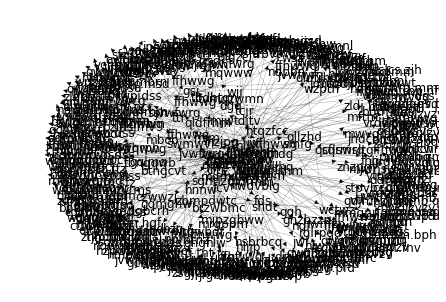

In [6]:
pos = nx.spring_layout(G)

plt = nx.draw(G, pos, node_size=0, style='--', width=0.2)
node_labels = nx.get_node_attributes(G,'name')
plt = nx.draw_networkx_labels(G, pos, labels = node_labels, horizontalalignment='left', verticalalignment='top')

In [11]:
dirSizes = {}
for nd in G.nodes:
    if G.nodes[nd]['type'] == 'dir':
        dsList = list(nx.descendants(G, nd))
        dSize = 0
        for ds in dsList:
            dSize += G.nodes[ds]['size']
        dirSizes[nd] = dSize
dirSizes

{0: 42677139,
 1: 1400951,
 2: 1978542,
 5: 10161796,
 6: 5370216,
 7: 23427191,
 9: 101940,
 12: 752508,
 13: 101940,
 20: 30443,
 25: 918045,
 27: 219638,
 28: 30443,
 30: 272548,
 31: 165670,
 36: 219638,
 38: 356258,
 40: 1992008,
 41: 4378649,
 42: 180419,
 44: 945438,
 45: 2023703,
 49: 11756,
 50: 149750,
 53: 277720,
 55: 807854,
 61: 229687,
 62: 254189,
 66: 229687,
 70: 181540,
 71: 1053089,
 73: 590544,
 74: 2111823,
 76: 264524,
 78: 282619,
 79: 159376,
 84: 102693,
 91: 904158,
 92: 244567,
 94: 105997,
 98: 541118,
 109: 35406,
 110: 338803,
 111: 571229,
 113: 117473,
 121: 281457,
 126: 958345,
 127: 281457,
 130: 329280,
 131: 97774,
 140: 1439695,
 142: 3106371,
 143: 444930,
 144: 15123,
 145: 287407,
 147: 326711,
 148: 161061,
 149: 63455,
 150: 188516,
 153: 70441,
 156: 257337,
 160: 55629,
 161: 7826,
 162: 55629,
 168: 218749,
 169: 1972044,
 173: 396406,
 179: 43660,
 180: 864119,
 182: 139542,
 185: 446213,
 186: 417906,
 194: 45969,
 199: 235867,
 202: 836

In [13]:
sumCandidates = 0
for d in dirSizes:
    if dirSizes[d] <= 100000:
        sumCandidates += dirSizes[d]
print('Part 2 Answser: ' + str(sumCandidates))

Part 2 Answser: 1182909
